In [99]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import sklearn

from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [100]:
df_full = pd.read_csv('Melbourne_housing_Full.csv')

In [101]:
df_full.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [102]:
df_less = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df_less.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [103]:
from pandas_profiling import ProfileReport

In [104]:
profile = ProfileReport(df_full, title="Pandas Profiling Report")

In [10]:
profile

In [105]:
df_less[df_less.Price >1500000].shape[0]/df_less.shape[0]

0.10731002967170715

In [107]:
df_less['HighPrice'] = df_less.Price > 1500000
df_less['HighPrice'].value_counts()

False    56260
True      6763
Name: HighPrice, dtype: int64

In [108]:
housing_small = df_less[['Rooms','Type','Method','Regionname','Distance','HighPrice']]
housing_small = pd.get_dummies(housing_small, columns = ['Type','Method','Regionname'])
housing_small

,Rooms,Distance,HighPrice,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,...,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,3,3.0,False,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,3,3.0,False,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,3.0,False,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,3,7.5,True,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2,10.4,False,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,2,10.4,False,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,2,10.4,False,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,3,10.4,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,6,14.0,False,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,3,3.0,True,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [109]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.0


In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
housing_small.columns

Index(['Rooms', 'Distance', 'HighPrice', 'Type_h', 'Type_t', 'Type_u',
       'Method_PI', 'Method_PN', 'Method_S', 'Method_SA', 'Method_SN',
       'Method_SP', 'Method_SS', 'Method_VB', 'Method_W',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object')

In [112]:
housing_small['HighPrice'].value_counts()

False    56260
True      6763
Name: HighPrice, dtype: int64

# Without SMOTE

In [113]:
X1=housing_small.drop(['HighPrice'], axis = 1)
y1=housing_small.HighPrice

In [114]:
y1.value_counts()

False    56260
True      6763
Name: HighPrice, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [116]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=0).fit(X1_train, y1_train)

In [117]:
y1_pred_dt=clf_DT.predict(X1_test)
from sklearn.metrics import classification_report
target_names = ['True', 'False']
print(classification_report(y1_test, y1_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

        True       0.93      0.97      0.95     16880
       False       0.59      0.41      0.48      2027

    accuracy                           0.91     18907
   macro avg       0.76      0.69      0.72     18907
weighted avg       0.90      0.91      0.90     18907



Feature: 0, Score: 0.19904
Feature: 1, Score: 0.27027
Feature: 2, Score: 0.18602
Feature: 3, Score: 0.00335
Feature: 4, Score: 0.00321
Feature: 5, Score: 0.01819
Feature: 6, Score: 0.01082
Feature: 7, Score: 0.02049
Feature: 8, Score: 0.00323
Feature: 9, Score: 0.03681
Feature: 10, Score: 0.03552
Feature: 11, Score: 0.00037
Feature: 12, Score: 0.02194
Feature: 13, Score: 0.00126
Feature: 14, Score: 0.01223
Feature: 15, Score: 0.00012
Feature: 16, Score: 0.00588
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00087
Feature: 19, Score: 0.16973
Feature: 20, Score: 0.00062
Feature: 21, Score: 0.00000


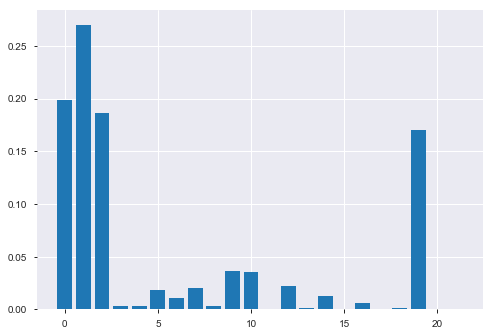

In [118]:
from matplotlib import pyplot
importance = clf_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

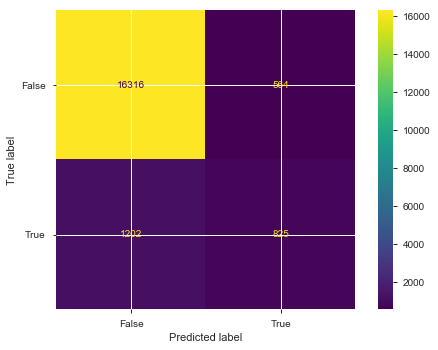

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y1_test, y1_pred_dt, labels=clf_DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_DT.classes_)
disp.plot()


# Using SMOTE

In [120]:
oversample = SMOTE()
X, y = oversample.fit_resample(housing_small[[ 'Rooms', 'Distance','Type_h', 'Type_t', 'Type_u',
       'Method_PI', 'Method_PN', 'Method_S', 'Method_SA', 'Method_SN',
       'Method_SP', 'Method_SS', 'Method_VB', 'Method_W',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria']],housing_small[['HighPrice']])

In [121]:
y['HighPrice'].value_counts()

True     56260
False    56260
Name: HighPrice, dtype: int64

# Train Test Split

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [123]:
from sklearn.tree import DecisionTreeClassifier
clf_DT1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [124]:
y_pred_dt=clf_DT1.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['True', 'False']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

        True       0.93      0.86      0.89     16965
       False       0.87      0.93      0.90     16791

    accuracy                           0.90     33756
   macro avg       0.90      0.90      0.90     33756
weighted avg       0.90      0.90      0.90     33756



Feature: 0, Score: 0.13964
Feature: 1, Score: 0.32349
Feature: 2, Score: 0.01748
Feature: 3, Score: 0.02603
Feature: 4, Score: 0.12071
Feature: 5, Score: 0.01004
Feature: 6, Score: 0.00618
Feature: 7, Score: 0.01298
Feature: 8, Score: 0.00160
Feature: 9, Score: 0.02607
Feature: 10, Score: 0.01081
Feature: 11, Score: 0.00087
Feature: 12, Score: 0.00751
Feature: 13, Score: 0.00209
Feature: 14, Score: 0.04515
Feature: 15, Score: 0.00041
Feature: 16, Score: 0.00542
Feature: 17, Score: 0.00137
Feature: 18, Score: 0.00761
Feature: 19, Score: 0.23094
Feature: 20, Score: 0.00251
Feature: 21, Score: 0.00110


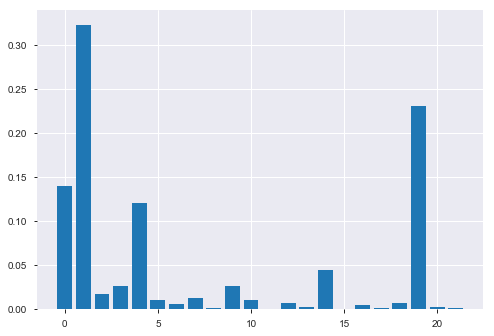

In [127]:
from matplotlib import pyplot
importance = clf_DT1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

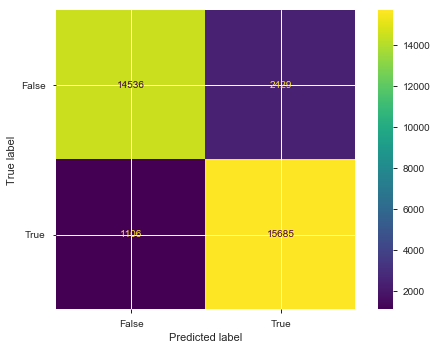

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_dt, labels=clf_DT1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_DT1.classes_)
disp.plot()